<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_3_globalTemp/Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

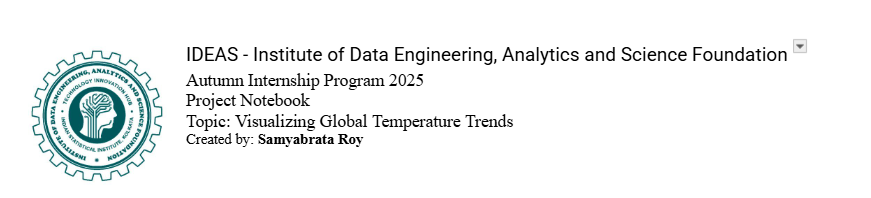

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

1. In mathematics, a time series is a series of data points indexed (or listed or graphed) in time order. A sequence of this series of data points is known as a time series dataset.
2. Python has it's merits like - user friendly language, extensive library support, reuse of existing code and wide open source availability. However, it also has demerits like - more time to load and handle larger datasets, plot them, etc.
In spite of these demerits, I personally feel that Python is the best programming language of choice for people, like me, who are analyzing datasets for the first time.

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

In [ ]:
file_id = "1nwrAxMqDudOnsryHMhchnbsVjjW7u6RT"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
try:
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)

    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

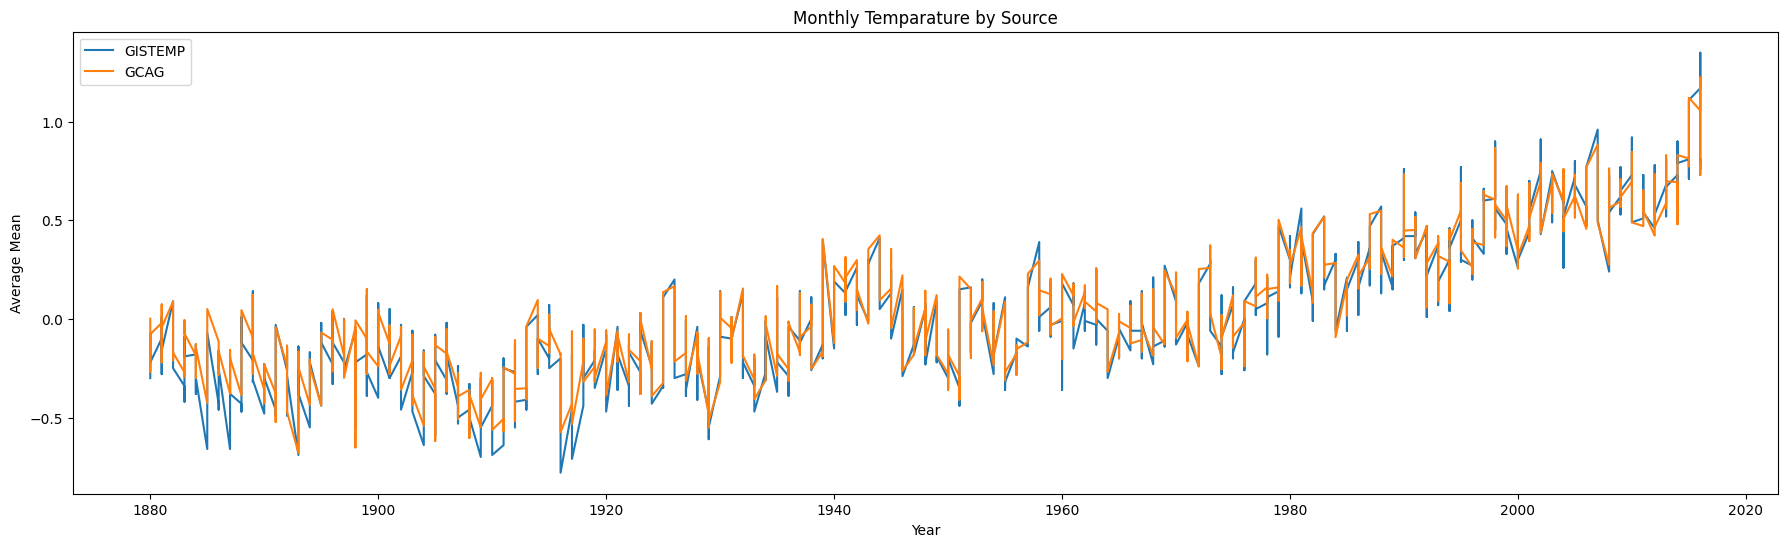

In [ ]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Plot line chart
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0)
plt.show()




---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

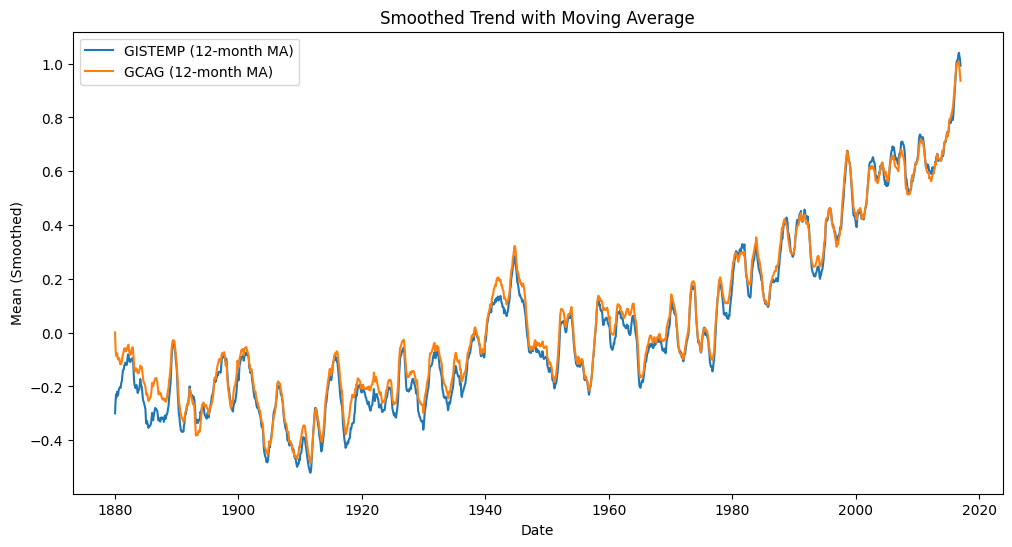

In [ ]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

The following conclusions can be drawn from the smoothed moving average -
1. The upward trend shows a rise in global temperatures.
2. The moving average lines are smoother and provide an easier overall understanding of the dataset.
3. Slope is steeper from the late 20th century onward, showing an increasing rate of warming.

Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

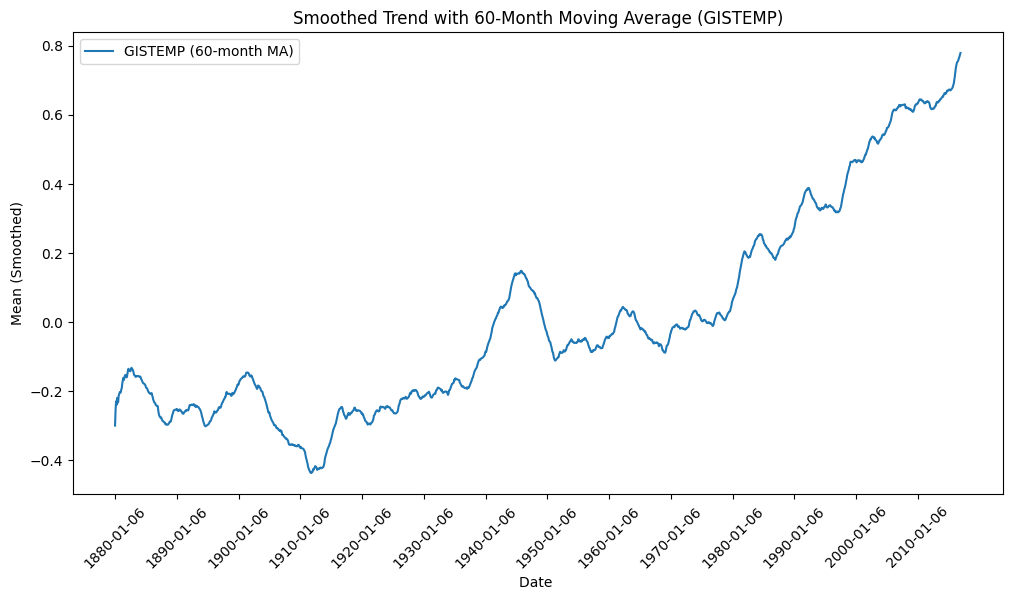

In [ ]:
# Filter for GISTEMP source
df_gistemp = df_temp[df_temp['Source'] == 'GISTEMP'].copy()

# Sort data by Date
df_gistemp = df_gistemp.sort_values(by="Date")

# Calculate 60-month moving average
df_gistemp['Moving_Avg_60'] = df_gistemp['Mean'].transform(lambda x: x.rolling(window=60, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
plt.plot(df_gistemp['Date'], df_gistemp['Moving_Avg_60'], label="GISTEMP (60-month MA)")

plt.title("Smoothed Trend with 60-Month Moving Average (GISTEMP)")
plt.xlabel("Date ")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.xticks(df_gistemp['Date'][::120], rotation=45) # Add ticks every 10 years (approx 12*10 months)
plt.show()




---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

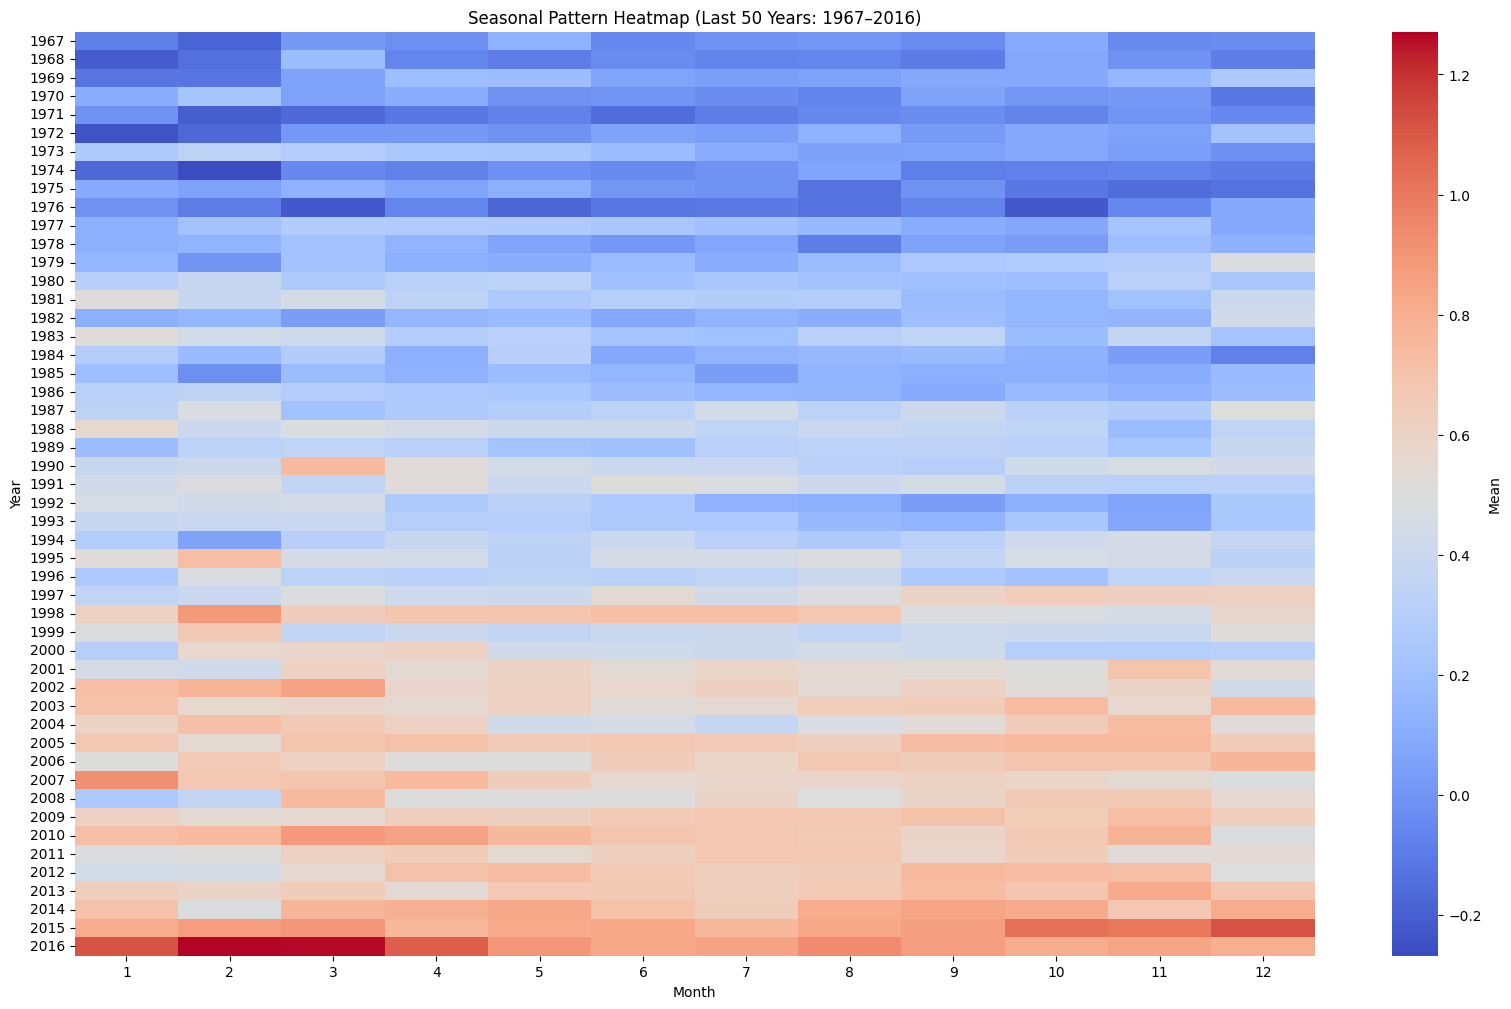

In [ ]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

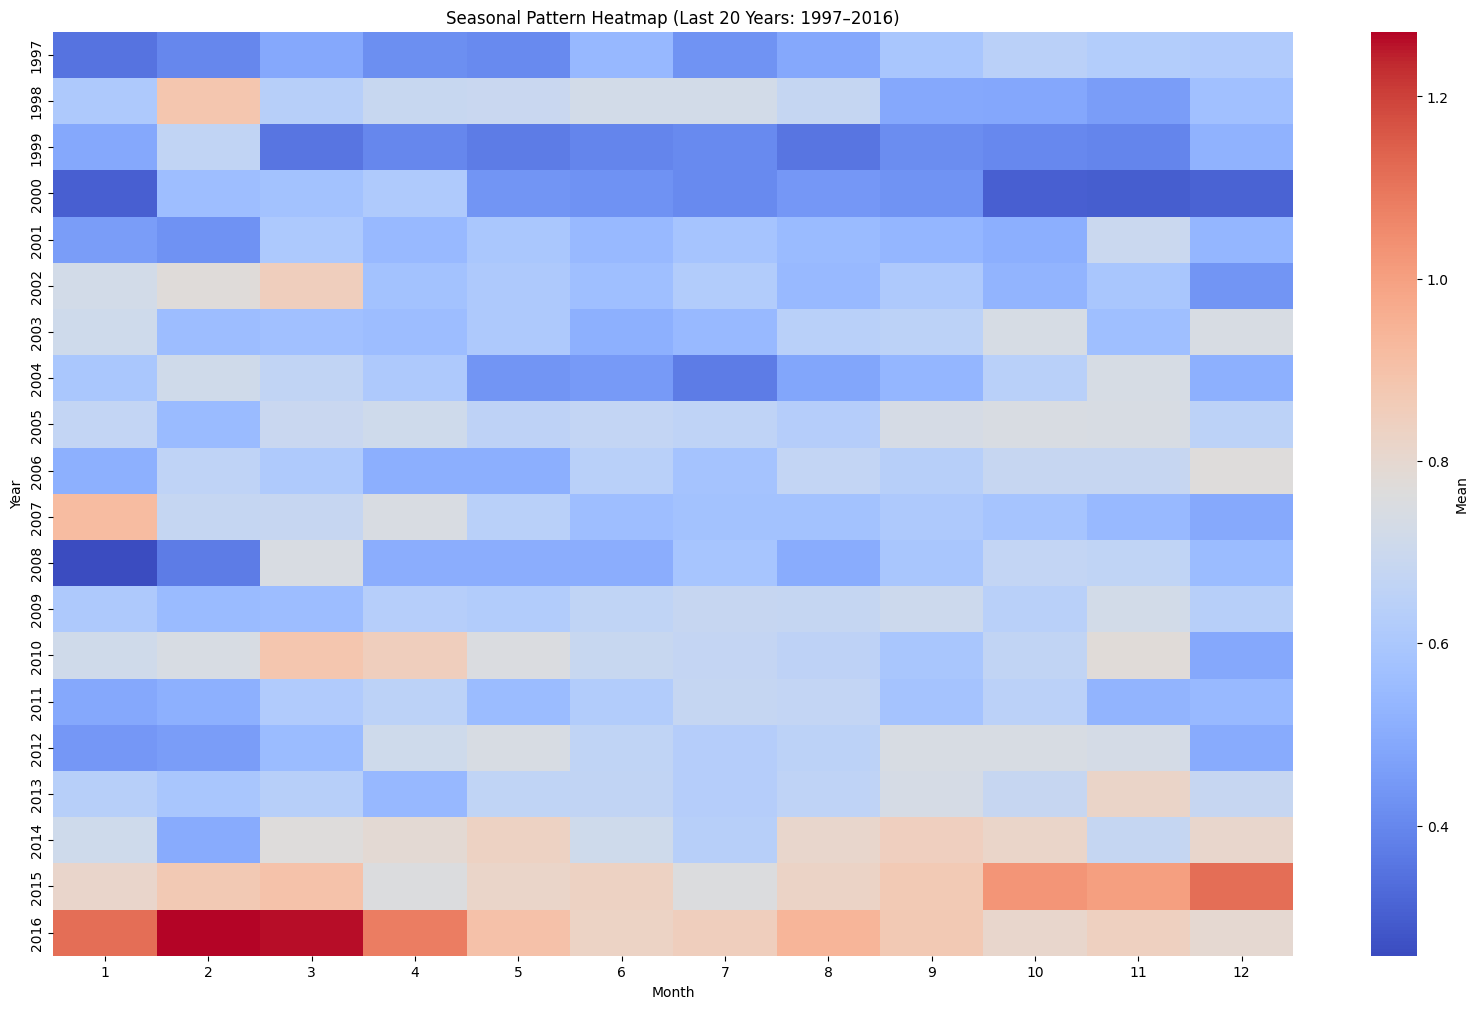

In [10]:
# Extract Year and Month
df_temp['Date'] = pd.to_datetime(df_temp['Date']) # Convert Date column to datetime format again
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last20.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 20 Years: {latest_year-19}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()



---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

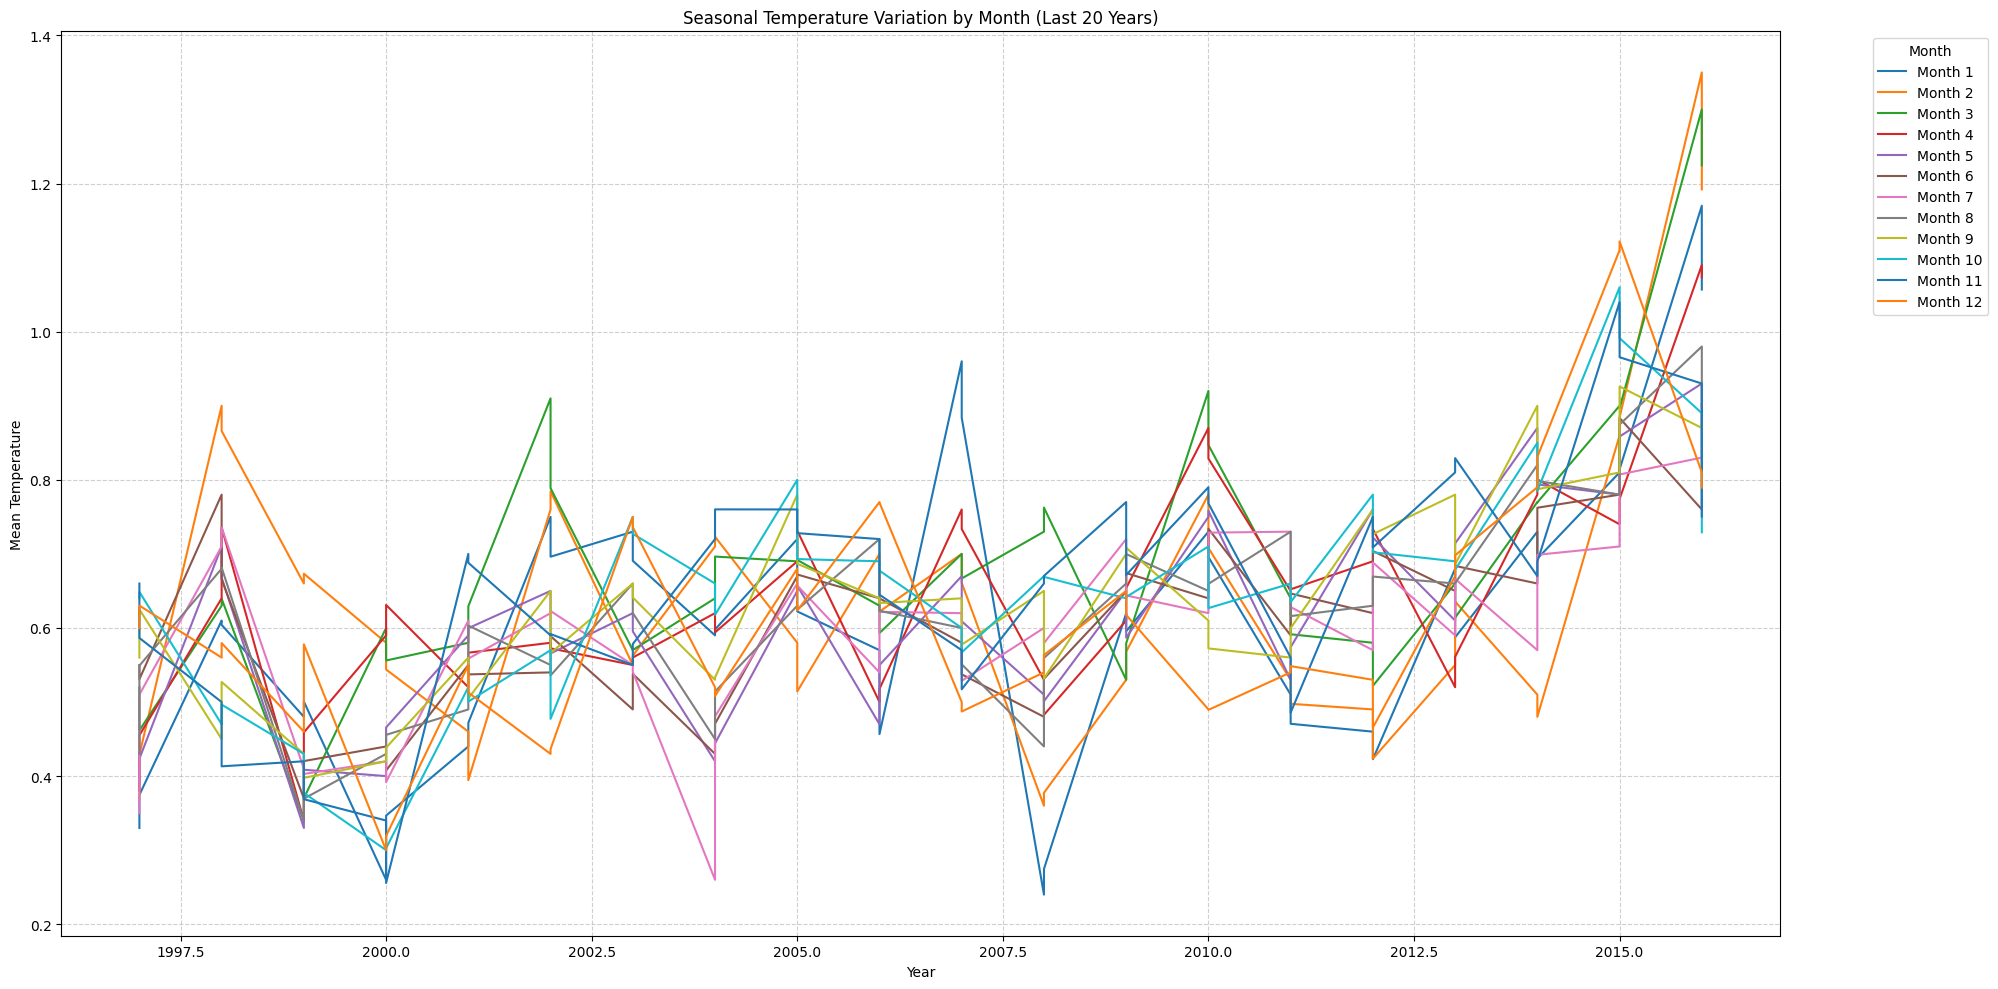

In [11]:
# Plotting seasonal variation using line plot
plt.figure(figsize=(20, 10))

for month in sorted(df_last20['Month'].unique()):
    subset = df_last20[df_last20['Month'] == month]
    plt.plot(subset['Year'], subset['Mean'], label=f'Month {month}')

plt.title("Seasonal Temperature Variation by Month (Last 20 Years)")
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

# Microsoft Stock - Time Series Analysis

In [13]:
import kagglehub

path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'microsoft-stock-time-series-analysis' dataset.
Path to dataset files: /kaggle/input/microsoft-stock-time-series-analysis


Stock Closing Price versus Date

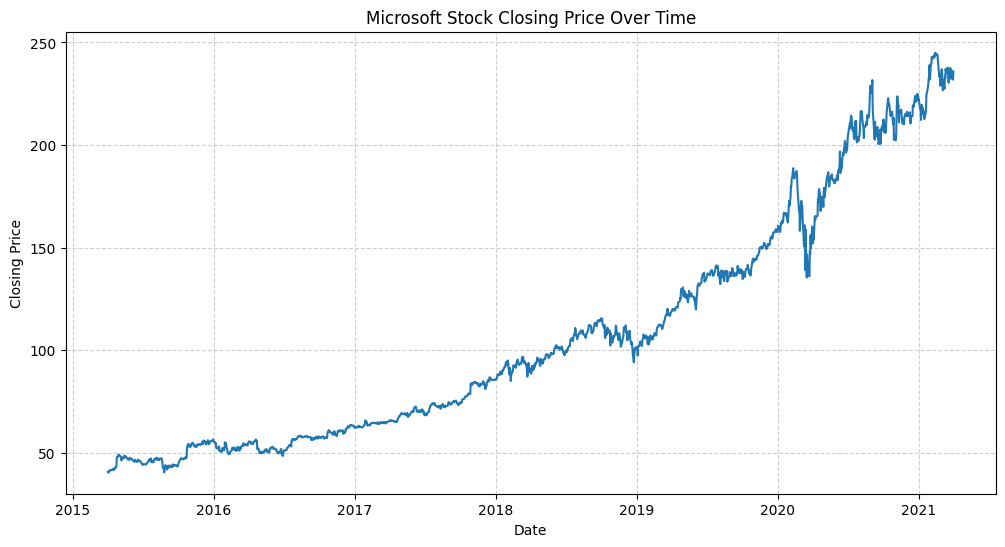

In [14]:
# Load the Microsoft stock data
stock_df = pd.read_csv(f"{path}/Microsoft_Stock.csv")

# Convert the 'Date' column to datetime objects
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(stock_df['Date'], stock_df['Close'])
plt.title("Microsoft Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

30 day moving average smooth graph

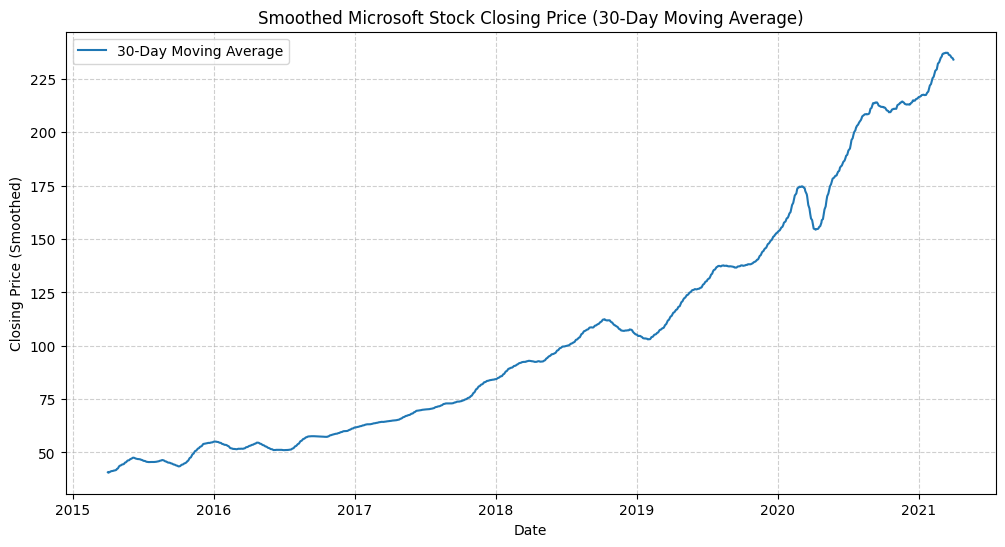

In [15]:
# Calculate a moving average (e.g., 30-day moving average)
stock_df['Moving_Avg_30d'] = stock_df['Close'].rolling(window=30, min_periods=1).mean()

# Plot the smoothed trend
plt.figure(figsize=(12, 6))
plt.plot(stock_df['Date'], stock_df['Moving_Avg_30d'], label="30-Day Moving Average")
plt.title("Smoothed Microsoft Stock Closing Price (30-Day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Closing Price (Smoothed)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Scatter plot to visualize the average closing price for each month and year

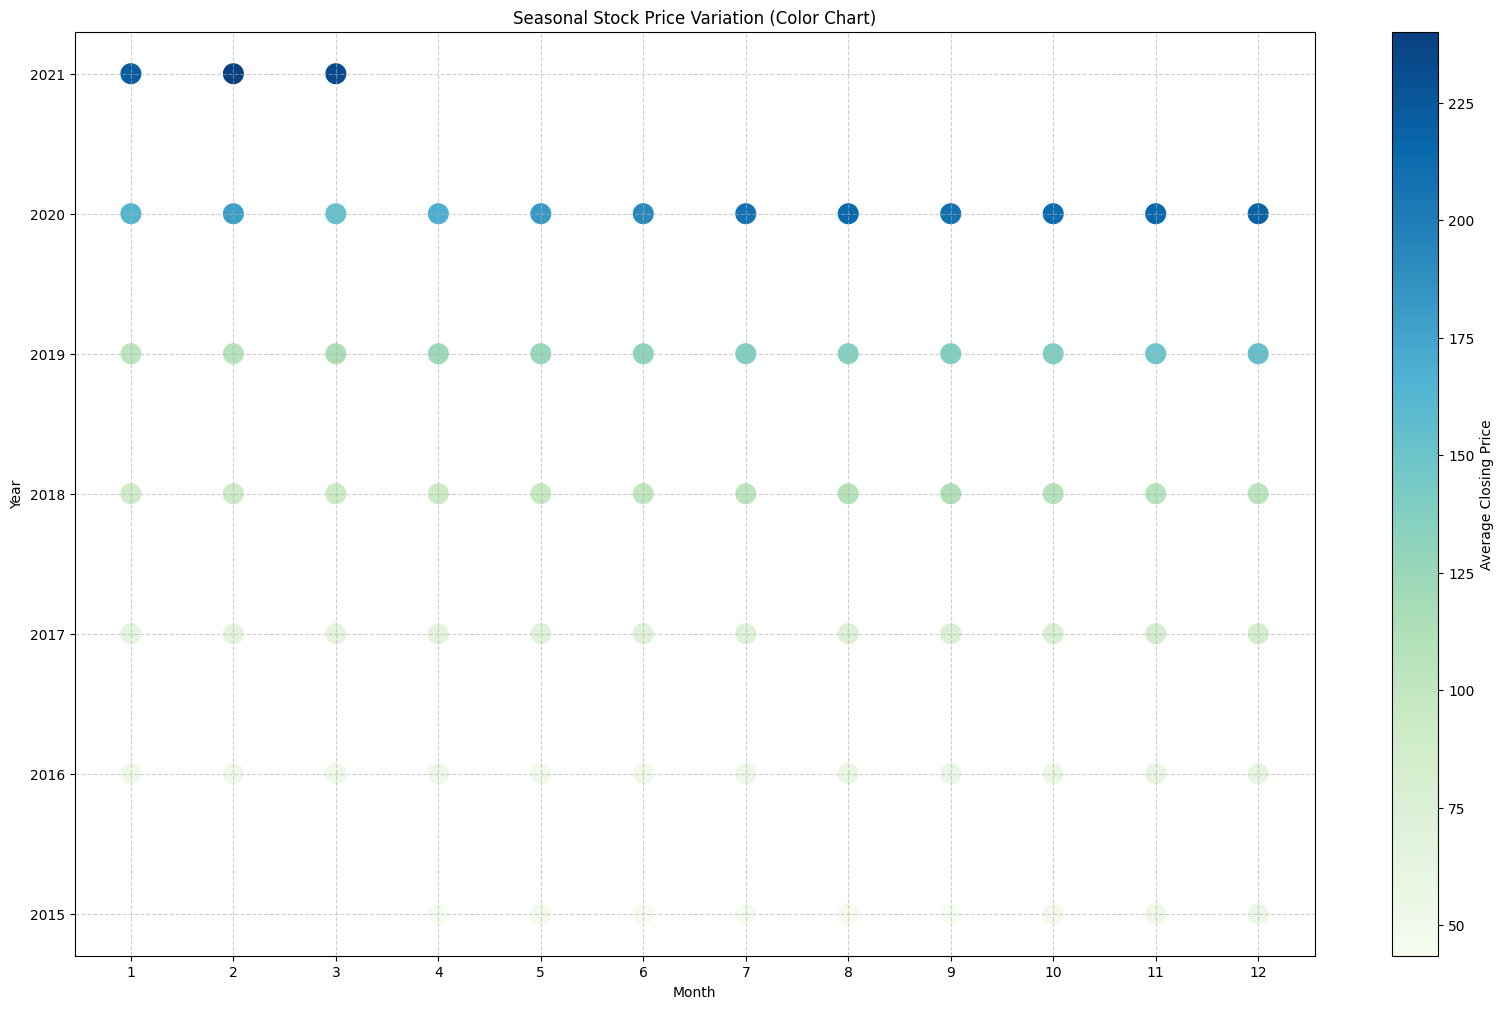

In [17]:
# Extract Year and Month from the stock data
stock_df['Year'] = stock_df['Date'].dt.year
stock_df['Month'] = stock_df['Date'].dt.month

# Group by Year and Month and calculate the mean closing price
seasonal_stock_data = stock_df.groupby(['Year', 'Month'])['Close'].mean().reset_index()

# Create a scatter plot with color representing the average closing price
plt.figure(figsize=(20, 12))
scatter = plt.scatter(seasonal_stock_data['Month'], seasonal_stock_data['Year'], c=seasonal_stock_data['Close'], cmap='GnBu', s=200)
plt.colorbar(scatter, label='Average Closing Price')
plt.title("Seasonal Stock Price Variation (Color Chart)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.yticks(seasonal_stock_data['Year'].unique()) # Set y-ticks to show each year
plt.xticks(seasonal_stock_data['Month'].unique()) # Set x-ticks to show each month
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The scatter plot is visualized in the form of a line plot with each year having a different color as given in the key

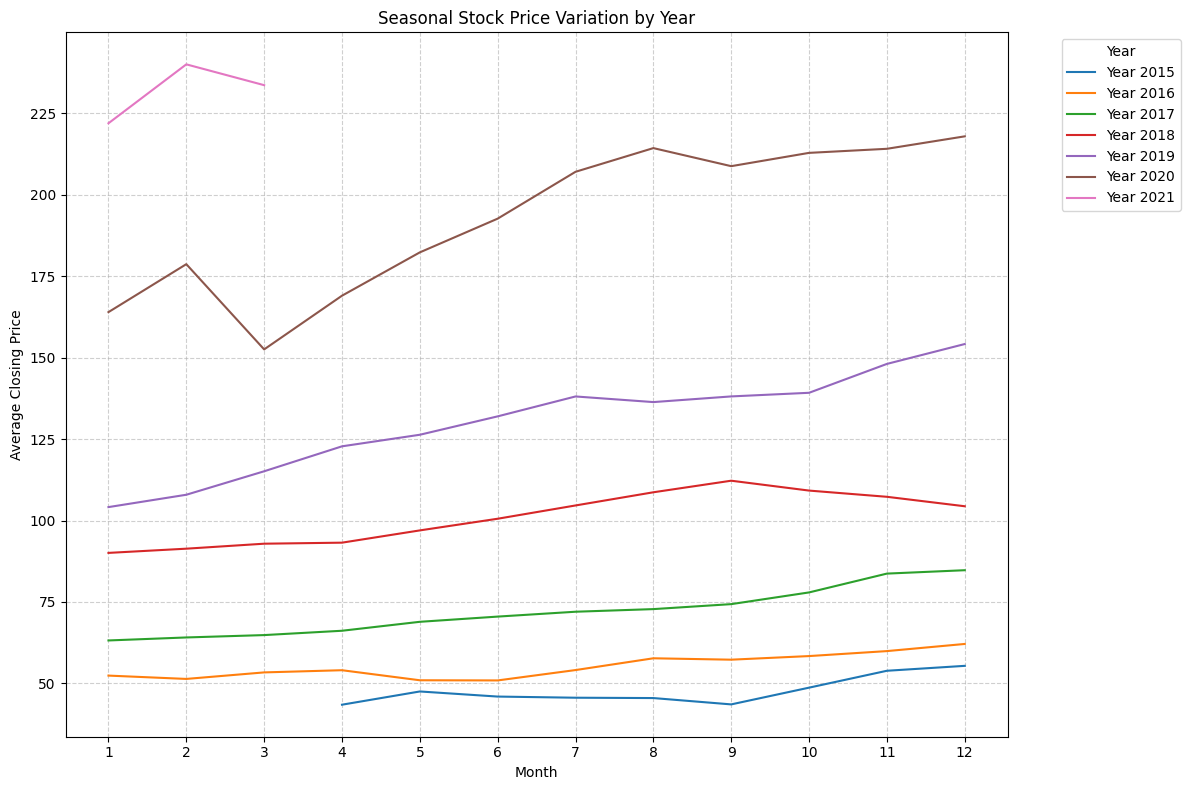

In [18]:
# Plotting seasonal stock price variation using line plot
plt.figure(figsize=(12, 8))

for year in sorted(seasonal_stock_data['Year'].unique()):
    subset = seasonal_stock_data[seasonal_stock_data['Year'] == year]
    plt.plot(subset['Month'], subset['Close'], label=f'Year {year}')

plt.title("Seasonal Stock Price Variation by Year")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.xticks(range(1, 13)) # Ensure all months are shown
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The following conclusions can be drawn from the Microsoft Stock Time Series Dataset -
1. There is a clear upward rise in prices from 2015 to early 2021.
2. The 30 day moving average confirms point (1).
3. The scatter plot provides insight into the yearly and monthly trend of the stock prices. It is observed that in spite of internal fluctuations, the yearly trend is on an upward rise. Years 2020 and 2021 show significantly higher stock prices.
